<a href="https://colab.research.google.com/github/ragalaa/Directory/blob/master/Senti_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs
import pickle 

C:\Users\Partha\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.
C:\Users\Partha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Partha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Partha\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [0]:
#importing the dataset
data_full = pd.read_excel('Associate Insights.xlsx')
data_full.head()

Date Sentiment HandleName                Store Name  \
0 2019-02-20   Concern    Surface       0071 - Edmonton, AB   
1 2019-02-20   Concern    Surface           0006 - Bellevue   
2 2019-02-20   Concern    Surface           0006 - Bellevue   
3 2019-02-20   Concern    Surface  8014 - Washington Square   
4 2019-02-20   Concern    Surface      0039 - Dadeland Mall   

                                             Comment  
0  A female customer made a comment on our select...  
1  Comments from customer today were that they wo...  
2  Customer came in asking today if there was any...  
3  Customer had an issue with their Surface Lapto...  
4  Customer name Patricia passed by the Store bou...

In [0]:
#adding the predictor field
data_full['Score'] = data_full["Sentiment"].apply(lambda x: 0 if x == 'Concern' else 1 if x == 'Positive' else 2)
data_full.head()

Date Sentiment HandleName                Store Name  \
0 2019-02-20   Concern    Surface       0071 - Edmonton, AB   
1 2019-02-20   Concern    Surface           0006 - Bellevue   
2 2019-02-20   Concern    Surface           0006 - Bellevue   
3 2019-02-20   Concern    Surface  8014 - Washington Square   
4 2019-02-20   Concern    Surface      0039 - Dadeland Mall   

                                             Comment  Score  
0  A female customer made a comment on our select...      0  
1  Comments from customer today were that they wo...      0  
2  Customer came in asking today if there was any...      0  
3  Customer had an issue with their Surface Lapto...      0  
4  Customer name Patricia passed by the Store bou...      0

In [0]:
data_full = data_full[['Sentiment', 'Comment', 'Score']]
data_full.tail(10)

Sentiment                                            Comment  Score
50089   General  Please add the processor type and RAM to the b...      2
50090   General  TypeCovers for Microsoft Studio games or even ...      2
50091  Positive  I love the Apps Now site!  It's a great idea t...      1
50092  Positive  Customers LOVE the HTC vive. They always leave...      1
50093   Concern  The techs need to be trained to better support...      0
50094   General  Surface Dial should have customized Commands o...      2
50095   Concern  Customers are upset when they break their phon...      0
50096   Concern  We have completed a slew of Band exchanges for...      0
50097   Concern  Will the Xbox Elite Controller work with proje...      0
50098   Concern  With Xbox Play Anywhere becoming more popular,...      0

In [0]:
data_full.describe()

Score
count  50099.000000
mean       0.495918
std        0.532281
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000

In [0]:
#using regular expression to clean the data 

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df
data = standardize_text(data_full, "Comment")
data.to_csv("clean_data.csv")


In [0]:
data.head()

Sentiment                                            Comment  Score
0   Concern  a female customer made a comment on our select...      0
1   Concern  comments from customer today were that they wo...      0
2   Concern  customer came in asking today if there was any...      0
3   Concern  customer had an issue with their surface lapto...      0
4   Concern  customer name patricia passed by the store bou...      0

In [0]:
clean_data = pd.read_csv("clean_data.csv")
clean_data[['Comment']] = clean_data[['Comment']].astype(str)

clean_data.head(10)

Unnamed: 0 Sentiment                                            Comment  \
0           0   Concern  a female customer made a comment on our select...   
1           1   Concern  comments from customer today were that they wo...   
2           2   Concern  customer came in asking today if there was any...   
3           3   Concern  customer had an issue with their surface lapto...   
4           4   Concern  customer name patricia passed by the store bou...   
5           5   Concern  customer says they have been losing her pen us...   
6           6   Concern  customer would like the surface pro to have a ...   
7           7   Concern  customers have been asking about a surface pro...   
8           8   Concern  device tech specs on microsoft com should list...   
9           9   Concern  microsoft fte discount on surface headphones i...   

   Score  
0      0  
1      0  
2      0  
3      0  
4      0  
5      0  
6      0  
7      0  
8      0  
9      0

In [0]:
clean_data.groupby("Score").count()

Unnamed: 0  Sentiment  Comment
Score                                
0           26089      26089    26089
1           23175      23175    23175
2             835        835      835

The positive and negative categories are well-balanced in the dataset. 

In [0]:
#Preparing the data
#tokenizing 

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_data["tokens"] = clean_data["Comment"].apply(tokenizer.tokenize)
clean_data.head()

Unnamed: 0 Sentiment                                            Comment  \
0           0   Concern  a female customer made a comment on our select...   
1           1   Concern  comments from customer today were that they wo...   
2           2   Concern  customer came in asking today if there was any...   
3           3   Concern  customer had an issue with their surface lapto...   
4           4   Concern  customer name patricia passed by the store bou...   

   Score                                             tokens  
0      0  [a, female, customer, made, a, comment, on, ou...  
1      0  [comments, from, customer, today, were, that, ...  
2      0  [customer, came, in, asking, today, if, there,...  
3      0  [customer, had, an, issue, with, their, surfac...  
4      0  [customer, name, patricia, passed, by, the, st...

In [0]:
#Inspection 

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_data["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

1752903 words total, with a vocabulary size of 19384
Max sentence length is 360


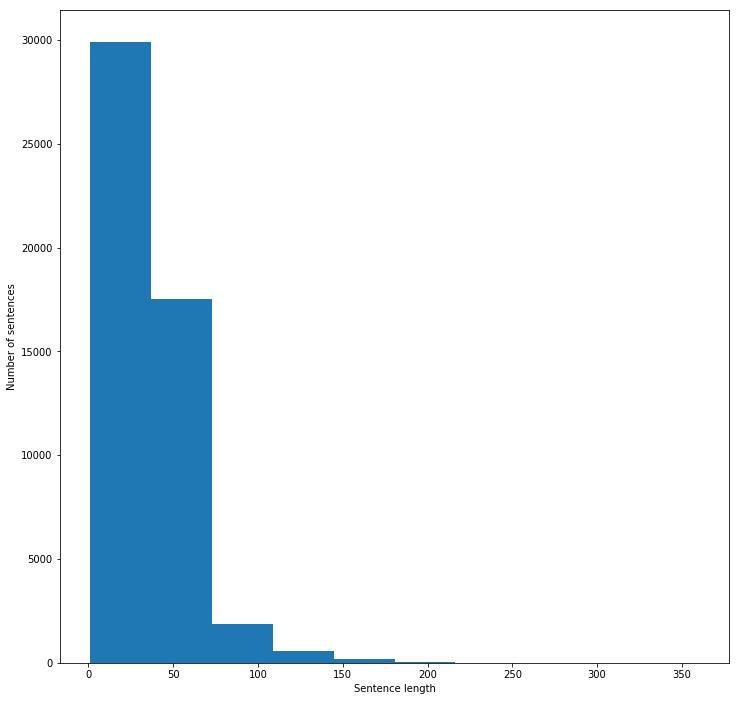

In [0]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

In [0]:
#bag of words model
#modeling using sparcity matrix

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = clean_data["Comment"].tolist()
list_labels = clean_data["Score"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [0]:
#Classifying
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

In [0]:
#Evaluating Classifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives + false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')
    
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives / total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.810, precision = 0.824, recall = 0.810, f1 = 0.817


In [0]:
#Confusion Matrix

import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.summer):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

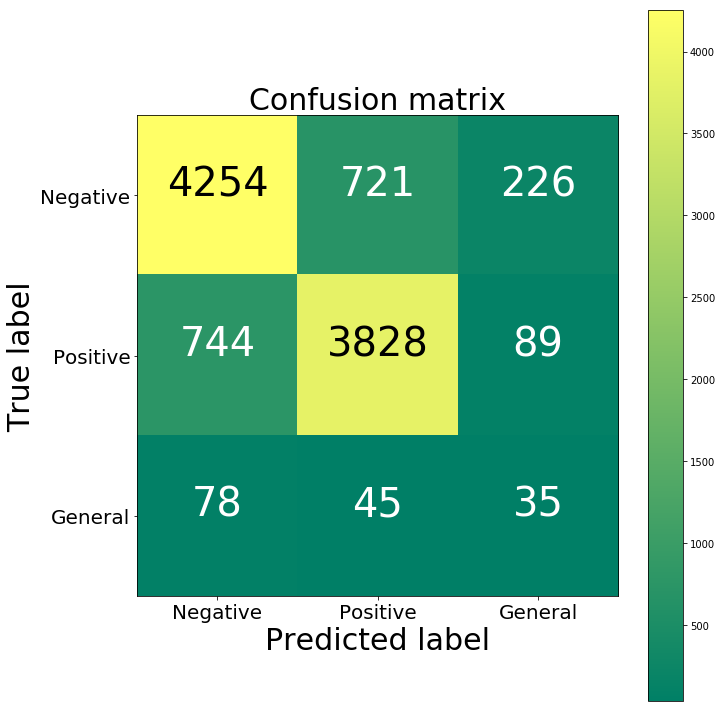

[[4254  721  226]
 [ 744 3828   89]
 [  78   45   35]]


In [0]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Negative','Positive','General'], normalize=False, title='Confusion matrix')
plt.show()
print(cm)

84% accurracy 

In [0]:
#top 10 features for each category 


def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 30)

In [0]:
importance

{0: {'tops': [(4.268668830690042, 'navigater'),
   (4.279287779052006, 'activation'),
   (4.294422164307855, 'bothered'),
   (4.329713646090557, 'veteran'),
   (4.3518771998872205, 'layering'),
   (4.392514328684344, 'wasted'),
   (4.414037041147338, 'accept'),
   (4.430618234238752, 'pointer'),
   (4.454813902716149, 'battlelfield'),
   (4.460905951956503, '1080'),
   (4.466573384528622, 'deducts'),
   (4.481820132044878, 'fulltime'),
   (4.485699661806541, 'surfacebook2'),
   (4.499421394254271, 'g72'),
   (4.520788521066291, 'stools'),
   (4.539007388842114, 'upright'),
   (4.619225409541681, 'involves'),
   (4.794659792302004, 'antendees'),
   (4.83185247281044, 'weekdays'),
   (4.880757462079422, 'trash'),
   (5.122846431667299, 'liners'),
   (5.215109848481047, 'bumper'),
   (5.244228169293655, 'concerning'),
   (5.415988534747804, 'difficulty'),
   (5.477251112495075, 'nail'),
   (5.654886380831366, 'shipments'),
   (5.692095059755234, 'immense'),
   (5.741123861272039, 'aspire'

In [0]:
import pickle 

In [0]:
top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
with open("positive.txt", "wb") as fp:
    pickle.dump(top_words, fp)

bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]
with open("negative.txt", "wb") as fp:
    pickle.dump(bottom_words, fp)

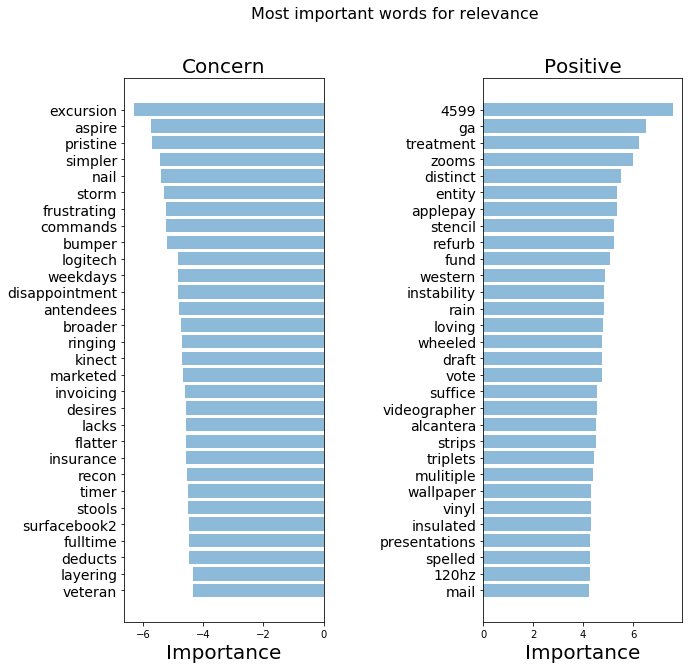

In [0]:
# to display the most frequently used neg and pos words as a bar chart

def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]    
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10
                             ))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Concern', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Positive', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()
    
plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")
    

Concern words seem ok, but the positive words do not make any sense at all 

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# word cloud of positive words

with open("positive.txt", "rb") as fp:
    positive_list = pickle.load(fp)
    positive_list = positive_list[::-1]
    

def show_wordcloud_pos(data, title = None):

    wordcloud = WordCloud(
        background_color = 'white', colormap = 'Blues',
        max_words = 200,
        max_font_size = 40, collocations=False,
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# wordcloud of negative words

with open("negative.txt", "rb") as fp:
    negative_list = pickle.load(fp)
    negative_list = negative_list[::-1]
    
def show_wordcloud_neg(data, title = None):

    wordcloud = WordCloud(
        background_color = 'white', colormap = matplotlib.cm.inferno,
        max_words = 200,
        max_font_size = 40, collocations=False,
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    


In [0]:
# print positive wordcloud

#show_wordcloud_pos(positive_list)

In [0]:
# print negative wordcloud

# show_wordcloud_neg(negative_list)

In [0]:
#trying to model using term frequency method

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [0]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

In [0]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.828, precision = 0.841, recall = 0.828, f1 = 0.834


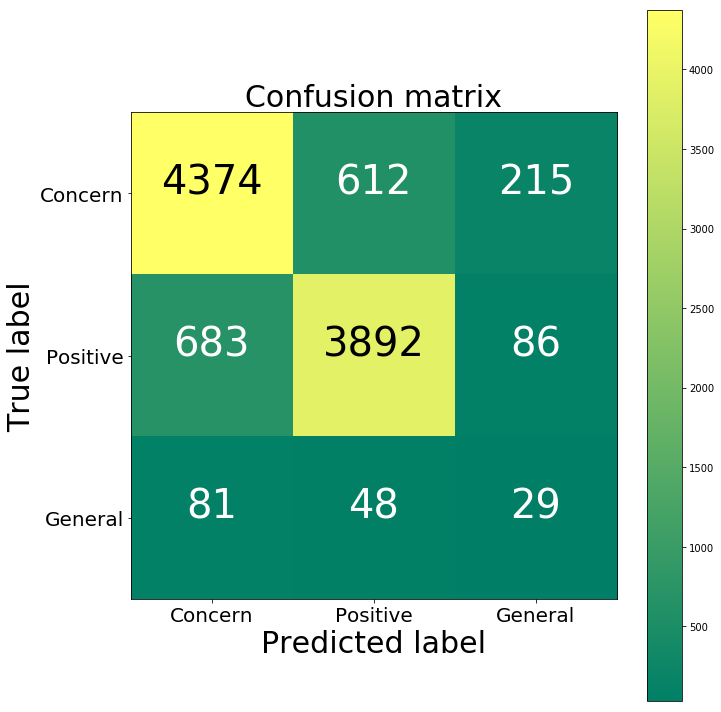

TFIDF confusion matrix
[[4374  612  215]
 [ 683 3892   86]
 [  81   48   29]]
BoW confusion matrix
[[4254  721  226]
 [ 744 3828   89]
 [  78   45   35]]


In [0]:

cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm2, classes=['Concern','Positive','General'], normalize=False, title='Confusion matrix')
plt.show()
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

86% accuracy, slight increase in accuracy but more true positives and true negatives

In [0]:
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 50)

In [0]:
top_scores = [a[0] for a in importance_tfidf[1]['tops']]
top_words = [a[1] for a in importance_tfidf[1]['tops']]
with open("pos_tfidf.txt", "wb") as fp:
    pickle.dump(top_words, fp)

bottom_scores = [a[0] for a in importance_tfidf[1]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[1]['bottom']]
with open("neg_tfidf.txt", "wb") as fp:
    pickle.dump(bottom_words, fp)


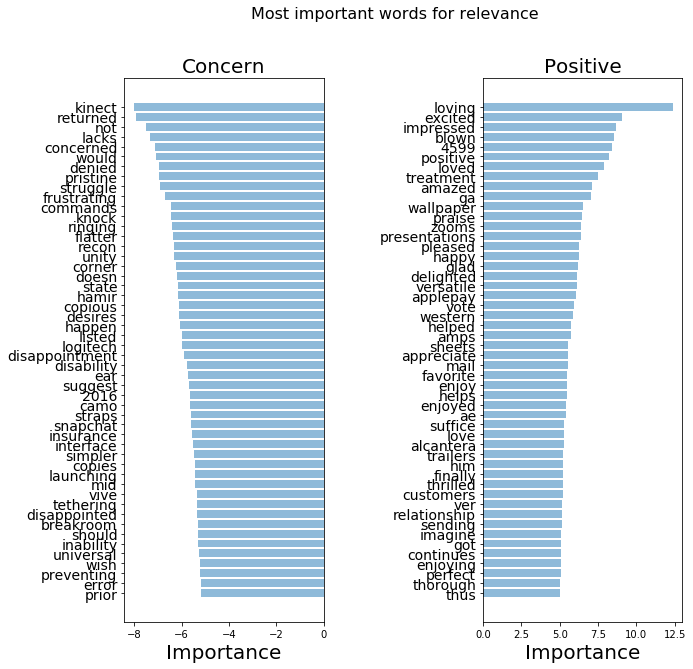

In [0]:
# to plot the most relevant words as a bar chart

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

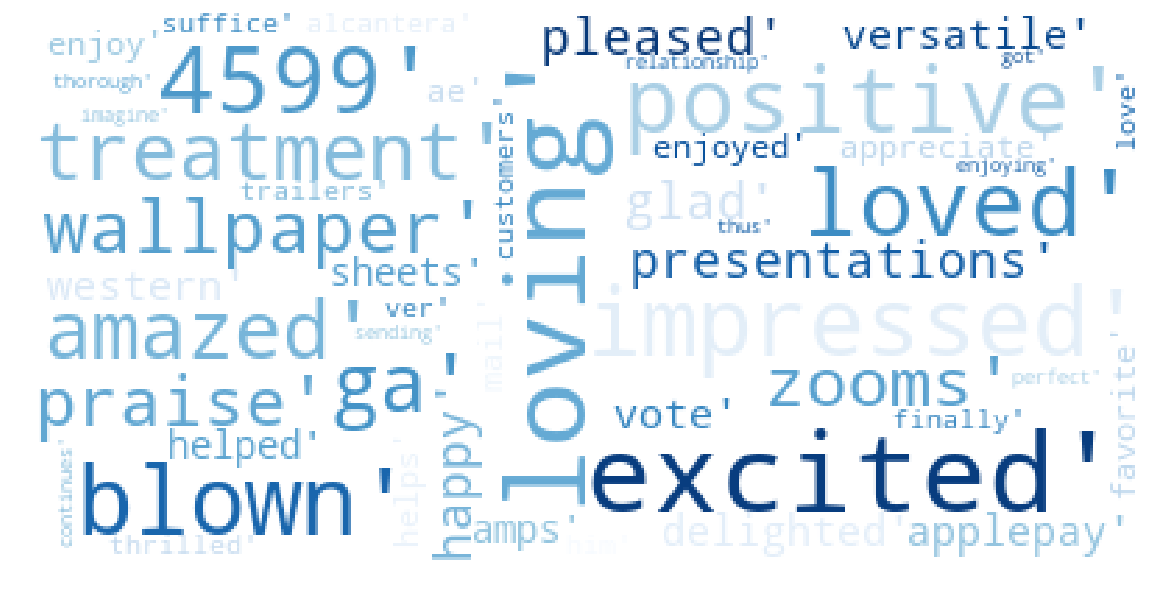

In [0]:
# wordcloud of positive words

with open("pos_tfidf.txt", "rb") as fp:
    pos_tfidf_list = pickle.load(fp)
    pos_tfidf_list = pos_tfidf_list[::-1]

show_wordcloud_pos(pos_tfidf_list)

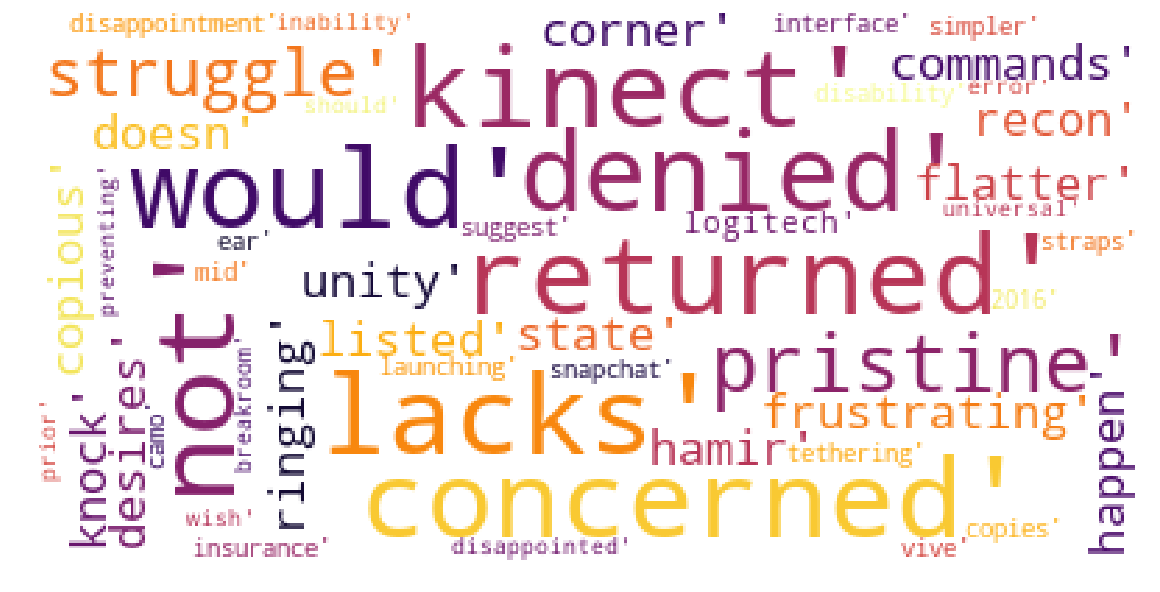

In [0]:
# wordcloud of negative words

with open("neg_tfidf.txt", "rb") as fp:
    neg_tfidf_list = pickle.load(fp)
    neg_tfidf_list = neg_tfidf_list[::-1]
    
show_wordcloud_neg(neg_tfidf_list)

Much better split of key words than before.

In [0]:
#taking into account the semantics of a sentence using word2vec

import gensim

word2vec_path = "GoogleNews-vectors-negative300.bin"

word2vec = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

C:\Users\Partha\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_data, generate_missing=False):
    embeddings = clean_data['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [0]:
embeddings = get_word2vec_embeddings(word2vec, clean_data)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, 
                                                                                        test_size=0.2, random_state=40)

In [0]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [0]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 0.714, precision = 0.829, recall = 0.714, f1 = 0.762


This drop in the accuracy is due to the involvement of the generic terms which skew the accuracy

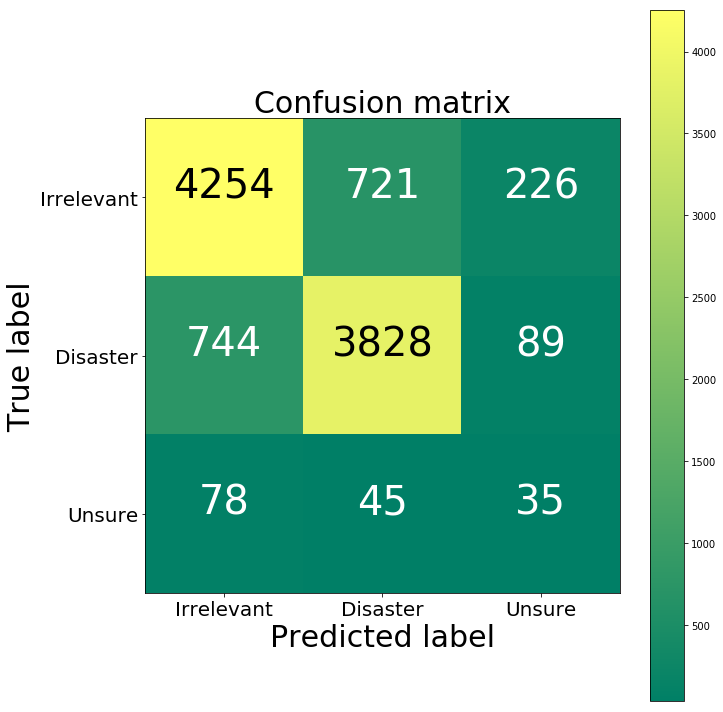

Word2Vec confusion matrix
[[3418  697 1086]
 [ 563 3652  446]
 [  49   28   81]]
TFIDF confusion matrix
[[4374  612  215]
 [ 683 3892   86]
 [  81   48   29]]
BoW confusion matrix
[[4254  721  226]
 [ 744 3828   89]
 [  78   45   35]]


In [0]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [0]:
from lime.lime_text import LimeTextExplainer

In [0]:
from sklearn.pipeline import make_pipeline


In [0]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

In [0]:
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []
    for example in examples:
        example_tokens = tokenizer.tokenize(example)
        vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)
        tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [0]:

def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ["Concern","Positive", "General"]):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [0]:
visualize_one_exp(X_test_data, y_test_data, 30)

Index: 30
True class: Concern


In [0]:
visualize_one_exp(X_test_data, y_test_data, 60)

Index: 60
True class: Positive


In [0]:
import random
from collections import defaultdict

random.seed(40)

def get_statistical_explanation(test_set, sample_size, word2vec_pipeline, label_dict):
    sample_sentences = random.sample(test_set, sample_size)
    explainer = LimeTextExplainer()
    
    labels_to_sentences = defaultdict(list)
    contributors = defaultdict(dict)
    
    # First, find contributing words to each class
    for sentence in sample_sentences:
        probabilities = word2vec_pipeline([sentence])
        curr_label = probabilities[0].argmax()
        labels_to_sentences[curr_label].append(sentence)
        exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
        listed_explanation = exp.as_list(label=curr_label)
        
        for word,contributing_weight in listed_explanation:
            if word in contributors[curr_label]:
                contributors[curr_label][word].append(contributing_weight)
            else:
                contributors[curr_label][word] = [contributing_weight]    
    
    # average each word's contribution to a class, and sort them by impact
    average_contributions = {}
    sorted_contributions = {}
    for label,lexica in contributors.items():
        curr_label = label
        curr_lexica = lexica
        average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
        for word,scores in curr_lexica.items():
            average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/sample_size
        detractors = average_contributions[curr_label].sort_values()
        supporters = average_contributions[curr_label].sort_values(ascending=False)
        sorted_contributions[label_dict[curr_label]] = {
            'detractors':detractors,
             'supporters': supporters
        }
    return sorted_contributions

label_to_text = {
    0: 'Concern',
    1: 'Positive',
    2: 'General'
}
sorted_contributions = get_statistical_explanation(X_test_data, 100, word2vec_pipeline, label_to_text)

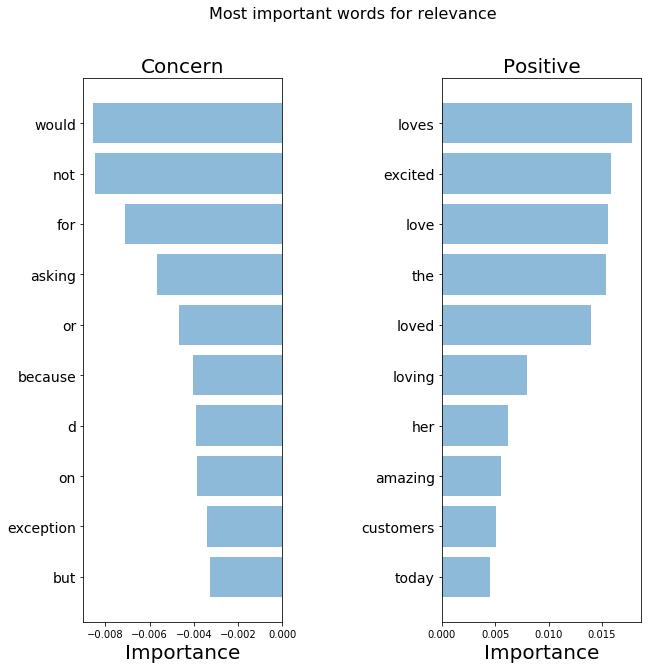

In [0]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['Positive']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['Positive']['supporters'][:10].tolist()
bottom_words = sorted_contributions['Positive']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['Positive']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [0]:
#Focusing on text structure

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_data["Comment"].tolist())
sequences = tokenizer.texts_to_sequences(clean_data["Comment"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_data["Score"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 20365 unique tokens.
(20366, 300)


In [0]:
from keras.layers import Concatenate
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):
    
    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    #l_merge = Merge(mode='concat', concat_axis=1)(convs)
    l_merge = keras.layers.Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)  
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [0]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM, len(list(clean_data["Score"].unique())), False)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 4)

Instructions for updating:
Use tf.cast instead.
Train on 40080 samples, validate on 10019 samples
Epoch 1/4
40080/40080 [==============================] - 86s 2ms/step - loss: 0.4530 - acc: 0.8215 - val_loss: 0.4363 - val_acc: 0.8290.
Epoch 3/4
40080/40080 [==============================] - 86s 2ms/step - loss: 0.3697 - acc: 0.8561 - val_loss: 0.4185 - val_acc: 0.8357
